**Movie Recommendation System**
* Author : MUKESH KUMAR G
* Domain : Data Science
* Aim    : To create a data model system using python for movies
recommendation

**OBJECTIVES :**
The objective of the machine learning model for a movie recommendation system is to predict and suggest movies that a user is likely to enjoy based on their past viewing habits and ratings.

By analyzing patterns in user behavior and movie attributes, the model aims to enhance user experience by providing personalized recommendations, thereby increasing user engagement and satisfaction with the platform.



IMPORTING LIBRARIES

In [30]:
pip install scikit-surprise

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

**DATASET**
* The dataset used for building the movie recommendation system is sourced from Kaggle, a well-known  website domain which has the dataset for movie ratings and metadata. It contains user ratings of movies, along with additional information such as movie titles, genres, and user IDs.
* This dataset will be crucial for understanding user preferences, performing exploratory data analysis, and building the recommendation model. The data includes both user-specific interactions (ratings) and movie-specific features, enabling the application of various recommendation techniques.

Load the Dataset

In [32]:
# Load the movies dataset
movies_df = pd.read_csv('/content/movies.csv')

# Load the ratings dataset
ratings_df = pd.read_csv('/content/ratings.csv')

# Display the first few rows of each dataset
print(movies_df.head())
print(ratings_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


Data Visualization

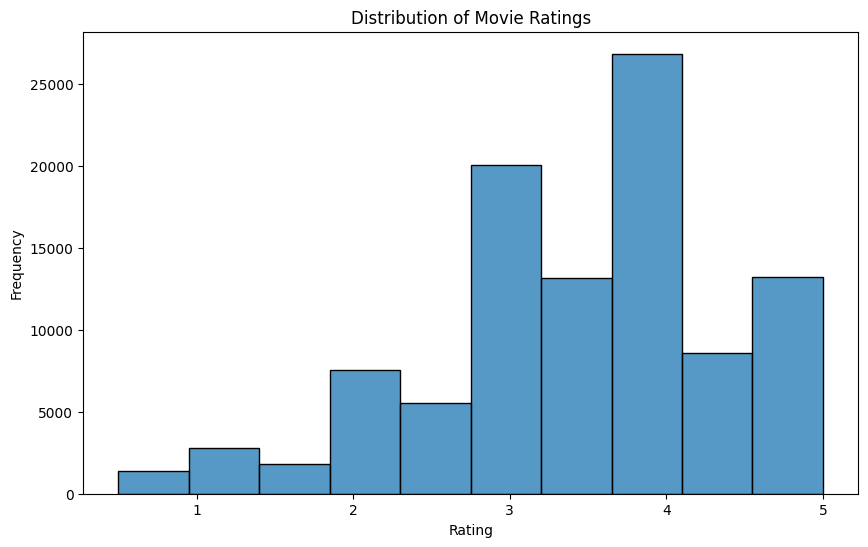

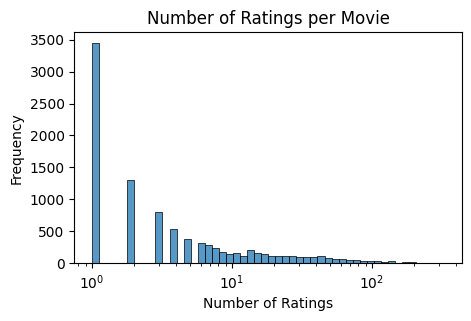

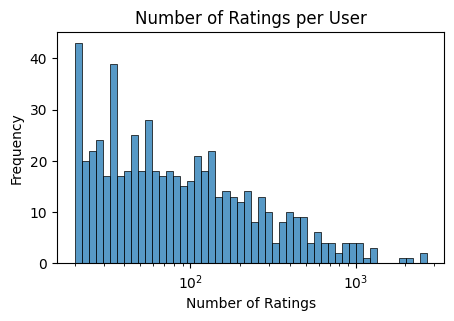

<ipython-input-33-bdb3f1f1774a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_movies_titles, x=top_movies, palette='viridis')


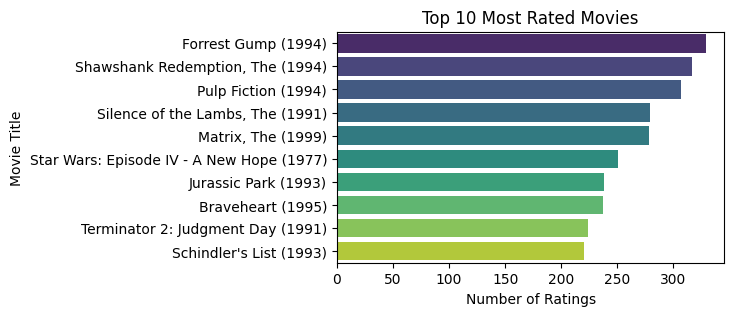

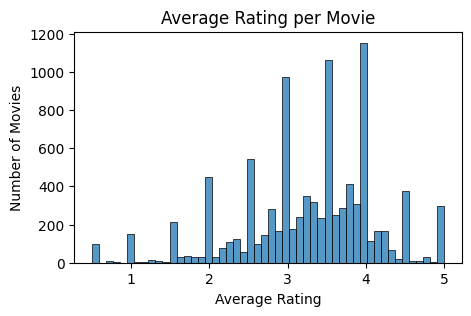

In [33]:
# 1. Distribution of Movie Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Number of Ratings per Movie
ratings_per_movie = ratings.groupby('movieId').size()
plt.figure(figsize=(5, 3))
sns.histplot(ratings_per_movie, bins=50, kde=False, log_scale=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# 3. Number of Ratings per User
ratings_per_user = ratings.groupby('userId').size()
plt.figure(figsize=(5, 3))
sns.histplot(ratings_per_user, bins=50, kde=False, log_scale=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# 4. Top 10 Most Rated Movies
top_movies = ratings['movieId'].value_counts().head(10)
top_movies_titles = movies.set_index('movieId').loc[top_movies.index]['title']
plt.figure(figsize=(5, 3))
sns.barplot(y=top_movies_titles, x=top_movies, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

# 5. Average Rating per Movie
average_ratings = ratings.groupby('movieId')['rating'].mean()
plt.figure(figsize=(5, 3))
sns.histplot(average_ratings, bins=50, kde=False)
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

Data Preparation for Surprise Library

In [34]:
# Define the reader format with rating scale
reader = Reader(rating_scale=(1, 5))  # Assuming the ratings are on a scale of 1 to 5

# Load the dataset into Surprise's format
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

Data Split

In [35]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

Train the Model

In [36]:
# Initialize the SVD algorithm
model = SVD()

# Train the model on the training set
model.fit(trainset)

Model Evaluation

In [37]:
# Make predictions on the test set
predictions = model.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = accuracy.rmse(predictions)
print(f"Root Mean Squared Error: {rmse}")

RMSE: 0.8815
Root Mean Squared Error: 0.8815079432502955


Make Movie Recommendation

In [38]:
# Function to recommend movies to a user
def recommend_movies(user_id, num_recommendations=5):
    # Get a list of all movie ids
    all_movie_ids = movies_df['movieId'].unique()

    # Get a list of movie ids the user has already rated
    rated_movie_ids = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()

    # Get a list of movie ids the user hasn't rated yet
    unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]

    # Predict ratings for unrated movies
    predictions = [model.predict(user_id, movie_id) for movie_id in unrated_movie_ids]

    # Sort the predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top 'num_recommendations' movies
    top_recommendations = predictions[:num_recommendations]

    # Return the recommended movie titles
    recommended_movie_ids = [int(pred.iid) for pred in top_recommendations]
    return movies_df[movies_df['movieId'].isin(recommended_movie_ids)]['title'].tolist()

# Example: Recommend movies for a user with ID 1
print(recommend_movies(1))

['Shawshank Redemption, The (1994)', 'Philadelphia Story, The (1940)', 'Casablanca (1942)', 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)', 'Streetcar Named Desire, A (1951)']


### **Model Explanation - Conclusion**

- **Personalization:** The movie recommendation system is designed to deliver personalized movie suggestions by analyzing user behavior and movie attributes, enhancing the overall user experience.

- **Collaborative Filtering:** By leveraging collaborative filtering, the model identifies patterns in user ratings, predicting preferences based on similarities between users and their interactions with movies.

- **Accuracy:** The model's performance is evaluated using metrics like RMSE, ensuring that the recommendations are accurate and reliable for a wide range of users.

- **Scalability:** The system is built to handle a large dataset, making it scalable and suitable for real-world applications where millions of users and movies are involved.

- **User Engagement:** By providing tailored movie recommendations, the model helps increase user engagement and satisfaction, making content discovery more intuitive and enjoyable.